# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Speling mistakes are wantedly kept in the file to show I practiced what I learnt ;)

In [2]:
#pwd

In [3]:
df = pd.read_csv('Advertising.csv')

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
X = df.drop('sales', axis=1)

In [6]:
y = df['sales']

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [9]:
# takes the X, does not do anything on it
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [10]:
# transforms the X as required (here,degree=2...)
poly_features = polynomial_converter.transform(X)

In [11]:
polynomial_converter.transform(X).shape

(200, 9)

In [12]:
#original X shape
X.shape

(200, 3)

In [13]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [14]:
poly_features.shape

(200, 9)

In [15]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

It has squared terms, interaction terms.   
No degree 3 terms.

In [16]:
# doing in a single step
#fit knows the degree
#transform creates new features
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

## Training and Evaluation

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [19]:
# Here X_train, X_test have 9 columns 
X_train[0]

array([1.932000e+02, 1.840000e+01, 6.570000e+01, 3.732624e+04,
       3.554880e+03, 1.269324e+04, 3.385600e+02, 1.208880e+03,
       4.316490e+03])

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)

LinearRegression()

In [23]:
test_predictions = model.predict(X_test)

In [24]:
# need 9 coeffs
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
MAE = mean_absolute_error(y_test, test_predictions)

In [27]:
MSE = mean_squared_error(y_test, test_predictions)

In [28]:
RMSE = np.sqrt(MSE)

In [29]:
MAE

0.48967980448038056

In [30]:
RMSE

0.664643175726924

In Linear Regression   
MAE = 1.2137457736144805   
RMSE = 1.5161519375993877


Polynomial Regression is better

#### Bias - Variance Trade off   
###### Overfitting (bias) vs Underfitting (variance)   

Overfitting catches the noise in train data set and gives huge error in test.(Hard to detect)     
Underfitting happens due to selecting simple model, not fits train data and test dataset both.(Easy to detect)      
Graph for Error(y) vs Model Complexity (x) for both test and train errors helps to choose complexity.    
For Polynomial Regression, model complexity is degree of polynomial.   
Let's check the above graph here.  

Use _for_ loop to collect errors.   

In [31]:
# Create different order polynomial
# split poly features into train/test
# fit on train
# store/save RMSE for both train and test
# Plot the result (Error vs degree)

In [32]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    
    #Create polynomial data of degree d
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    # split poly features into train/test
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # fit on train
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    #predictions on both train and test X
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    #Calculate errors    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    # store/save RMSE for both train and test
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    
    

In [33]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292231,
 0.4339344356902067,
 0.35170836883993606,
 0.25093429381786897,
 0.1945666472024403,
 5.423737279770718,
 0.14168056686637134,
 0.17093527228363956]

In [34]:
test_rmse_errors

[1.5161519375993877,
 0.664643175726924,
 0.5803286825161322,
 0.5077742623175882,
 2.575837063490081,
 4.214027384734879,
 1374.9574048884183,
 4344.727850519797,
 93796.02671838581]

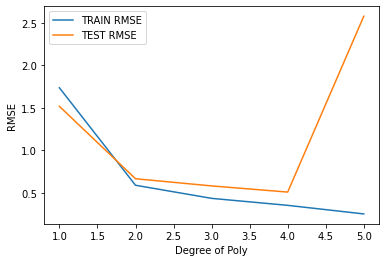

In [37]:
# Plot the result (Error vs degree)
plt.plot(range(1,6),train_rmse_errors[:5], label='TRAIN RMSE')
plt.plot(range(1,6),test_rmse_errors[:5], label='TEST RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()

Ideally 4th degree looks good both errors are at minimum wrt each other.   
Domain knowldege helps, no need to go to  4th order as it is difficult to interpret.   
2nd or 3rd order will do.   

We choose degree 3 here.  
Create a model and save for futire use.   

In [38]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [39]:
final_model = LinearRegression()

In [40]:
full_converted_X =  final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [41]:
from joblib import dump,load

In [42]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [43]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [44]:
# loading the model in future to use
loaded_converter = load('final_converter.joblib')

In [45]:
loaded_model = load('final_poly_model.joblib')

In [46]:
# say a new data used for prediction
campaign = [[149, 22, 12]]    # 149 on TV, 22 on radio, 12 on newspaper

In [47]:
loaded_converter.fit_transform(campaign)

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [48]:
loaded_converter.fit_transform(campaign).shape

(1, 19)

In [49]:
transformed_data = loaded_converter.fit_transform(campaign)

In [50]:
loaded_model.predict(transformed_data)

array([14.64501014])

End of Polynomial Regression

$-------------------------------------------------------$